2023-08-20 10:38:30.400668: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 10:38:30.751688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 10:38:30.757617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 10:38:33.031448: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


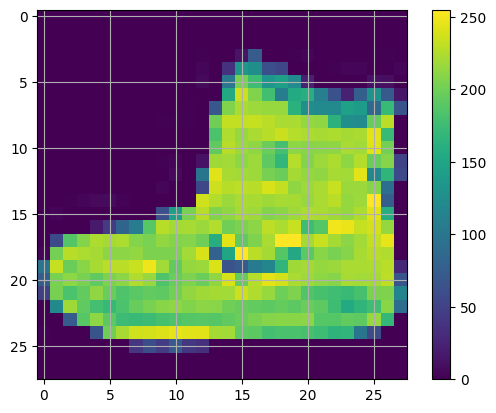

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

fashion_mnist  = keras.datasets.fashion_mnist 

(train_images , train_lables) , (test_images , test_labels) = fashion_mnist.load_data()

# print(train_images.shape)

# print(train_images[0,23,23])

# print(train_images[:10]) #Using sliceing to take a look at the first 10 of the values 

class_names = ['T-shirt/top' , 'Trouser' , 'Pulover' , 'Dress' , 'Coat' , 'Sandel' , 'Shirt' ,'Sneaker' ,'Bag' ,'Ankel Boat' ]

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show() # This requirs gui so a notebook editor must be used , can't use terminal


In [4]:
#Traning models using sequential api 

# Now the trasin images must be converted from grayscale images to an image of vlaues between 0 and 1 by deviding image values by 255 
# which will result the values to change into 0 or 1 depending on their devisiblity on 255 (grayscale image ranges between 0-255 

train_images = train_images/255.0

test_images = test_images/255.0 


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # input layer (1)
    keras.layers.Dense(128, activation='relu'),   # hidden layer (2)
    keras.layers.Dense(10, activation='softmax'), # hidden layer (3)
])

2023-08-20 10:38:40.978802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-20 10:38:40.979230: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
# Eger execution 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_lables, epochs=10)

2023-08-20 10:42:19.840914: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4992 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3745 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3347 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3110 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2942 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2797 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2690 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2567 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2453 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - 

In [9]:
test_loss , test_acc = model.evaluate(test_images , test_labels)

print('Test accuracy : ',test_acc)

2023-08-20 10:46:03.055960: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8805
Test accuracy :  0.8805000185966492


In [10]:
#Makeing predictions
predictions = model.predict(test_images)

predictions[0]

  1/313 [..............................] - ETA: 29s

2023-08-20 10:47:55.247743: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


array([3.2167600e-07, 8.3863388e-10, 5.5838594e-08, 2.1499279e-10,
       1.1341383e-07, 3.5862633e-04, 8.5887416e-07, 2.1646426e-03,
       4.2236481e-09, 9.9747533e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
test_labels[0]

9

1/1 [==============================] - 0s 30ms/step


AttributeError: 'str' object has no attribute 'items'

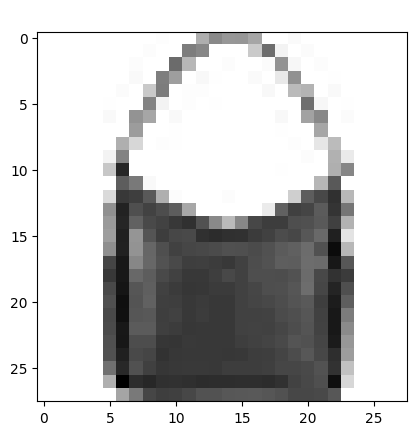

In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image , correct_label):
    class_names = ['T-shirt/top' , 'Trouser' , 'Pulover' , 'Dress' , 'Coat' , 'Sandel' , 'Shirt' ,'Sneaker' ,'Bag' ,'Ankel Boat' ]
    predictions=model.predict(np.array([image]))
    predict_class = class_names[np.argmax(predictions)]
    
    show_image(image, class_names[correct_label],predict_class)
    
    
def show_image(img, label , guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected : " , label)
    plt.xlabel("Guess : " , guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True :
        num = input("Pick a number")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else :
            print("Try again.... ")
            
num = get_number()
image = test_images[num]
label = test_labels[num] 
predict(model , image , label)  
